In [3]:
%%html
<!-- keep this cell - to align tables to the left in markdown cells below -->
<style>table {display: inline-block}</style>

In [4]:
import sys,os
import pandas as pd
import numpy as np

from scipy import stats
import math

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## A/B Split Testing

Importance of A/B Split testing:

In 2012, a Microsoft employee working on the search engine Bing 
<br>created an experiment to test different ways of displaying 
<br>advertising headlines. 
<br>
<br>Within hours, the alternative format produced a revenue 
<br>increase of 12% with no impact on user-experience metrics. 
<br>
<br>Today, companies like Microsoft and Google each 
<br>conduct over 10,000 A/B tests annually.

- https://towardsdatascience.com/the-art-of-a-b-testing-5a10c9bb70a4
- https://en.wikipedia.org/wiki/A/B_testing


| Assumed Distribution | Example Case                     | Standard Test                    | Alternative Test |
| -------------------- | -------------------------------- | -------------------------------- | ---------------- |
| Gaussian             | Average revenue per user         | Welch's t-test (Unpaired t-test) | Student's t-test |
| Binomial             | Click-through rate               | Fisher's exact test              | Barnard's test   |
| Poisson              | Transactions per paying user     | E-test                           | C-test           |
| Multinomial          | Number of each product purchased | Chi-squared test                 |                  |
| Unknown              |                                  | Mann–Whitney U test              | Gibbs sampling   |


<br> Some links :
- https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test - test of the equality of 1-dim probability distributions
- https://en.wikipedia.org/wiki/Welch%27s_t-test - 
- https://en.wikipedia.org/wiki/Barnard%27s_test - 
- https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test - 
- https://en.wikipedia.org/wiki/Gibbs_sampling - 
- https://en.wikipedia.org/wiki/Z-test - 

Examples:
 - click rate (or click-through rate) - percentage of people who clicked the link
 - product pricing A/B split test

Note:
 - A/B split test may give oposite results for different segments

Suppose we have two samples A and B, 
each has "n" points, where n is relatively large (100+ points), 
and distributions have "normal" shape 
with same sample standard deviation "s".

The mean values are m<sub>A</sub> and m<sub>B</sub>

The standard error of the mean

<center><font color="blue"><b>sem = s/sqrt(n)</b></font></center>

Question – how big should be number of points so that we
can say that the means differ?

We can demand that 

<center><font color="blue"><b>δ = |m<sub>A</sub> - m<sub>B</sub>| >= 4*sem = 4s/sqrt(n)</b></font></center>

Or 

<center><font color="blue"><b>n >= 16s<sup>2</sup>/δ<sup>2</sup></b></font></center>


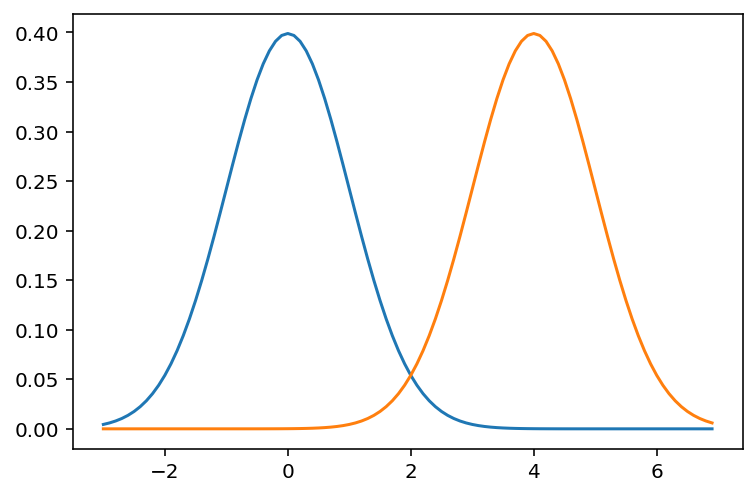

In [5]:
# Visual example - difference of 4 sigmas

z = np.arange(-8, 8, 0.1)
arr0 = stats.norm.pdf(z)
arr1= arr0[50:-10]
arr2= arr0[10:-50]
xx = [0.1*x-3 for x in range(len(arr1))]
# print(len(arr0))
# print(len(arr1))
# print(len(arr2))
# print(len(xx))
plt.plot(xx, arr1)
plt.plot(xx, arr2)
plt.show()

### Example
from https://towardsdatascience.com/the-art-of-a-b-testing-5a10c9bb70a4 

Suppose we have two versions of website: A (old) and B (new).
<br>We want to do A/B split test comparing:
 - Average time spent on the landing page per session
 - Conversion rate, defined as proportion of sessions ending up with a transaction

We split traffic A/B = 60/40

Suppose our data looks like this:

| Version | number of sessions | avg(time) | std(time) | conversion rate |
| ------- | ------------------ | --------- | --------- | --------------- |
| A       | 6000               | 60 s      | 40 s      | 1.50%           |
| B       | 4000               | 62 s      | 45 s      | 2.00%           |


Z_score : 2.274907
p_val   : 0.011456
We REJECT the null hypothesis (using alpha = 0.05)


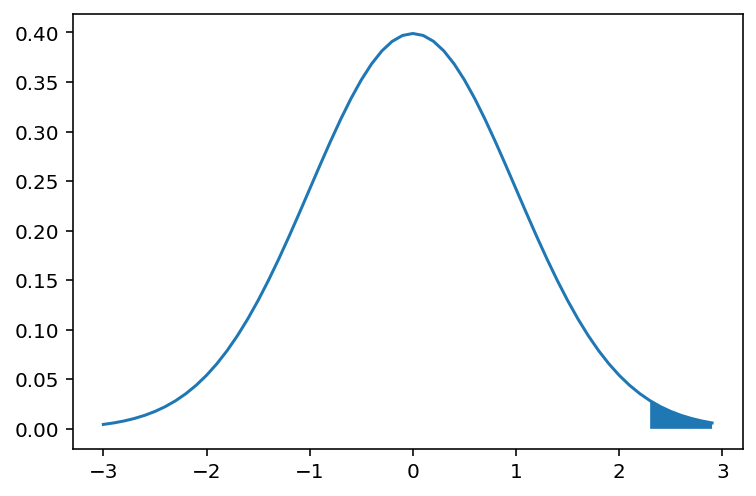

In [6]:
# Null Hypothesis: "the average time spent is the same for the two versions"

mu_B = 62
mu_A = 60

std_B = 45
std_A = 40

n_B = 4000
n_A = 6000

Z = (mu_B - mu_A)/np.sqrt(std_B**2/n_B + std_A**2/n_A)
p_val = stats.norm.sf(Z)

print(f"Z_score : {Z:.6f}")
print(f"p_val   : {p_val:.6f}")
alpha = 0.05
action = "ACCEPT" if p_val >= 0.05 else "REJECT"
print(f"We {action} the null hypothesis (using alpha = {alpha:.2f})")

z = np.arange(-3, 3, 0.1)
plt.plot(z, stats.norm.pdf(z))
plt.fill_between(z[z>Z], stats.norm.pdf(z[z>Z]))
plt.show()

distance d: 3.5904
p_val     : 0.0581


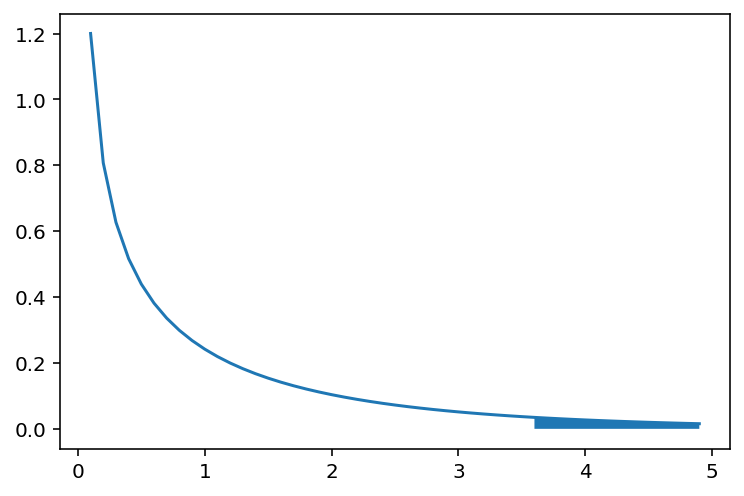

In [7]:
# chi-square test for conversion rate
             
# conv_A, conv_B, non_conv_A, non_conv_B
O = np.array([90, 80, 5910, 3920])   # observed
E = np.array([102, 68, 5898, 3932])  # expected (if same percent)

D = np.sum(np.square(O-E)/E)

p_val = stats.chi2.sf(D, df=1)

print(f"distance d: {D:.4f}")
print(f"p_val     : {p_val:.4f}")

d = np.arange(0, 5, 0.1)
plt.plot(d, stats.chi2.pdf(d, df=1))
plt.fill_between(d[d>D], stats.chi2.pdf(d[d>D], df=1))
plt.show()

Z-score : 1.8427
p_val   : 0.0581


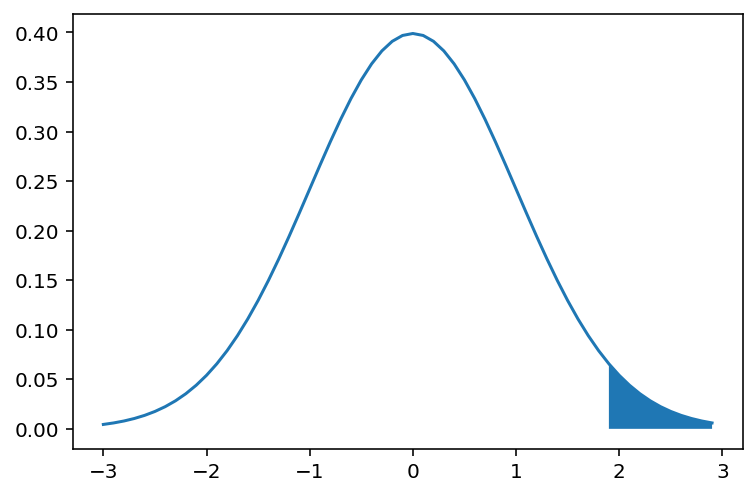

In [8]:
# Z-test for conversion rate

mu_B = 0.02
mu_A = 0.015

var_B = mu_B * (1-mu_B)
var_A = mu_A * (1-mu_A)

n_B = 4000
n_A = 6000

Z = (mu_B - mu_A)/np.sqrt(var_B/n_B + var_A/n_A)
pvalue = stats.norm.sf(Z)

print(f"Z-score : {Z:.4f}")
print(f"p_val   : {p_val:.4f}")

z = np.arange(-3, 3, 0.1)
plt.plot(z, stats.norm.pdf(z))
plt.fill_between(z[z>Z], stats.norm.pdf(z[z>Z]))
plt.show()

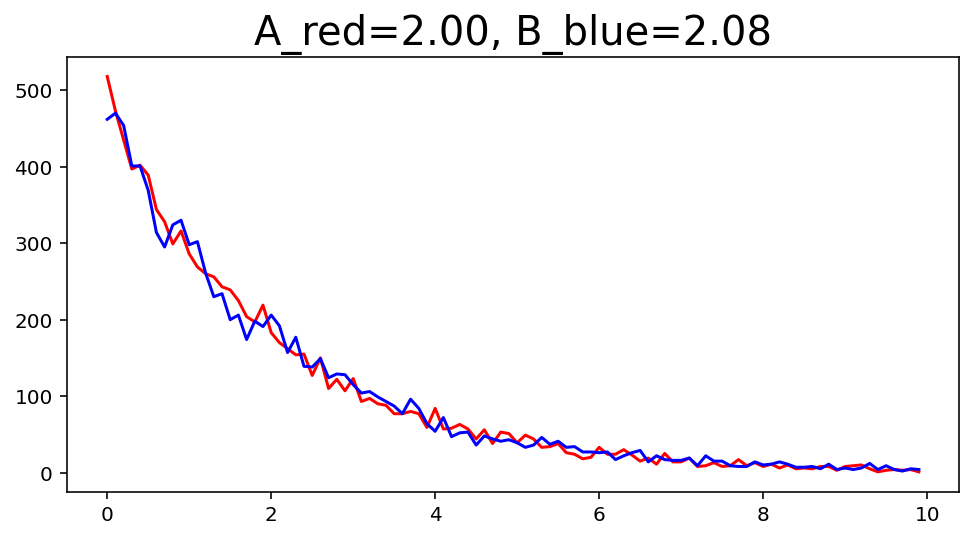

In [9]:
# Let's create two similar (but different) 
# exponential distributions

N=10000
scale_A = 2.0
scale_B = 2.08
A = np.random.exponential(scale=scale_A, size=N)
B = np.random.exponential(scale=scale_B, size=N)

# show on a graph
BINS = 100
STEP = 0.1
RANGE = int(BINS*STEP)
ah = np.histogram(A, bins=BINS,range=(0,RANGE))[0]
bh = np.histogram(B, bins=BINS,range=(0,RANGE))[0]
mylen = min(len(ah),len(bh))
ah = ah[:mylen]
bh = bh[:mylen]
xh = [STEP*x for x in list(range(mylen))]

plt.rcParams["figure.figsize"] = (8, 4) # (width, height)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(xh, ah, color='red')
ax.plot(xh, bh, color='blue')
ax.set_title(f"A_red={scale_A:.2f}, B_blue={scale_B:.2f}", fontsize= 20)
plt.show();

diff_AB    = 0.07392
diffs mean = 0.02263
diffs std  = 0.01686
P-value    = 0.0094


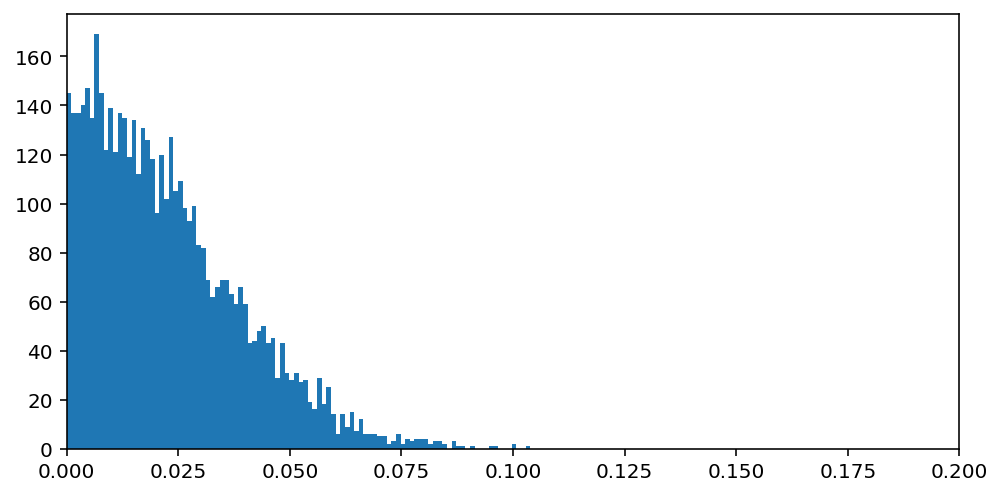

In [10]:
# actual difference
diff_AB = np.abs(np.mean(A) - np.mean(B)) 

C = np.concatenate((A,B)) # Combined

N_shuf = 5000
counter = 0 # count extreme diffs
diffs = np.zeros(N_shuf, dtype=float)
rng = np.random.default_rng()
for ii in range(N_shuf):
    rng.shuffle(C, axis = 0)
    split1 = C[:N]
    split2 = C[N:]
    diffs[ii] = np.abs(np.mean(split2) - np.mean(split1))
        
    if diffs[ii] >= diff_AB:
        counter += 1

diffs_mean = np.mean(diffs)   
diffs_std  = np.std(diffs)
print(f"diff_AB    = {diff_AB:.5f}")     # 0.4
print(f"diffs mean = {diffs_mean:.5f}")  # 0
print(f"diffs std  = {diffs_std:.5f}")   # 0.03
print(f"P-value    = {counter/N_shuf}")  # 0.0002

plt.rcParams["figure.figsize"] = (8, 4) # (width, height)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(diffs,bins=100)
ax.set_xlim(left=0,right=0.2)
plt.show();